**Done in Google Colab GPU**

In [1]:
!nvidia-smi

Thu May 16 19:34:06 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 418.67       Driver Version: 410.79       CUDA Version: 10.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   53C    P8    16W /  70W |      0MiB / 15079MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [52]:
import numpy as np
import matplotlib.pyplot as plt
!pip install imgaug
from imgaug import augmenters as iaa
from imgaug import parameters as iap
import random
from sklearn.model_selection import train_test_split 

In [0]:
X = np.load("X.np.npy")
y = np.load("y.np.npy")

In [31]:
print(X.shape, y.shape)

(11238, 60, 80, 3) (11238,)


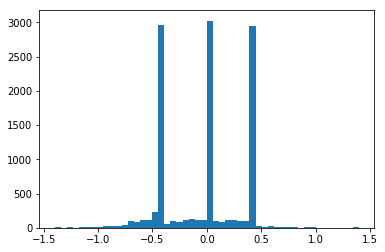

In [32]:
plt.hist(y, 50);

In [0]:
# 3 peaks are caused by driving straight ahead
# +/-0.4 was created to include left/right cameras' view

0.0


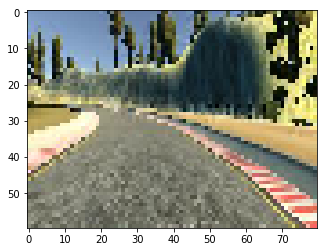

0.325


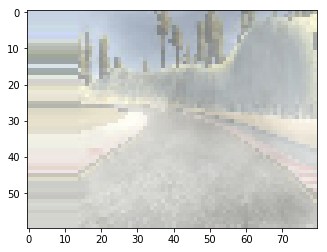

In [62]:
def augment(img, steering_angle):
  # flip
  if random.random() > 0.5:
    img = img[:, ::-1, :]
    steering_angle = -steering_angle
  # blur
  blurer = iaa.GaussianBlur(iap.Uniform(0.1, 1.0))
  img = blurer.augment_image(img)
  # RGB shuffle
  sh = iaa.ChannelShuffle(p=0.5)
  img = sh.augment_image(img)
  # fog
  fog = iaa.Fog()
  img = fog.augment_image(img)
  # translate
  tx = random.randint(-20, 20)
  translater = iaa.Affine(translate_px={"x":tx}, 
                         mode="edge")
  img = translater.augment_image(img)
  steering_angle += tx*0.025 
  return img, steering_angle  

plt.imshow(X[0])
print(y[0])
plt.show();

img, angle = augment(X[0], y[0])
plt.imshow(img)
print(angle)
plt.show();

In [0]:
X_train, X_val, y_train, y_val =  train_test_split(X, y, test_size=0.2,
                                                  random_state=42)

In [64]:
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)

(8990, 60, 80, 3) (8990,)
(2248, 60, 80, 3) (2248,)


In [68]:
Xgen = []
ygen = []
for i in range(X_train.shape[0]):
  img, angle = augment(X[i], y[i])
  Xgen.append(img)
  ygen.append(angle)

Xgen = np.array(Xgen)
ygen = np.array(ygen)
print(Xgen.shape, ygen.shape)

(8990, 60, 80, 3) (8990,)


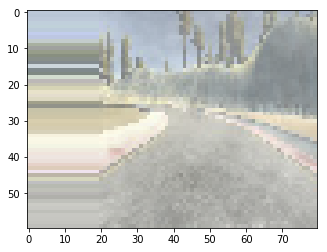

In [66]:
plt.imshow(Xgen[0]);

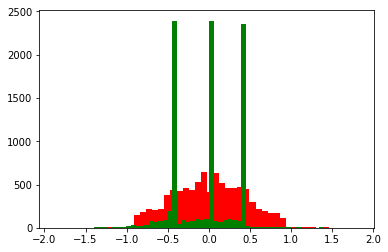

In [70]:
plt.hist(ygen, 50, facecolor="red");
plt.hist(y_train, 50, facecolor="green");